In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
data = load_iris()
X, y, column_names = data['data'], data['target'], data['feature_names']
X = pd.DataFrame(X, columns = column_names)

## Байесовская

In [ ]:
from sklearn.naive_bayes import GaussianNB
accuracy_b = dict()
precision_b = dict()
recall_b = dict()
f1_b = dict()
for tr_size in np.arange(0.6, 0.9, 0.05):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  model = GaussianNB()
  model.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_b[key] = accuracy_score(y_val, model.predict(X_val))
  precision_b[key] = precision_score(y_val, model.predict(X_val), average='macro')
  recall_b[key] = recall_score(y_val, model.predict(X_val), average='macro')
  f1_b[key] = f1_score(y_val, model.predict(X_val), average='macro')

<BarContainer object of 7 artists>

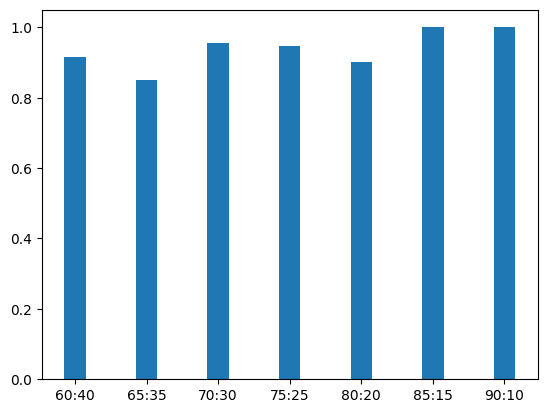

In [ ]:
plt.bar(accuracy_b.keys(), accuracy_b.values(), 0.3)

<BarContainer object of 7 artists>

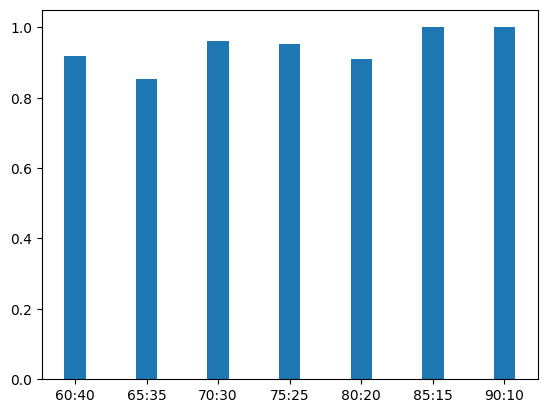

In [ ]:
plt.bar(precision_b.keys(), precision_b.values(), 0.3)

<BarContainer object of 7 artists>

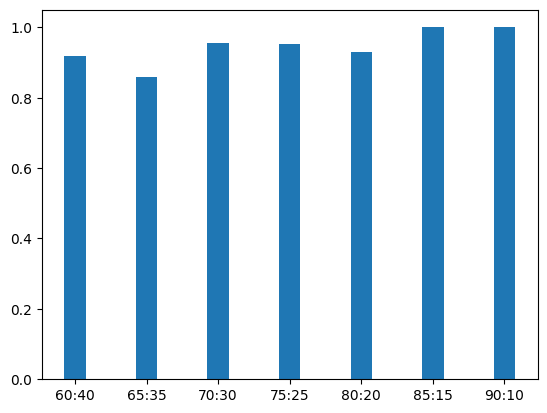

In [ ]:
plt.bar(recall_b.keys(), recall_b.values(), 0.3)

<BarContainer object of 7 artists>

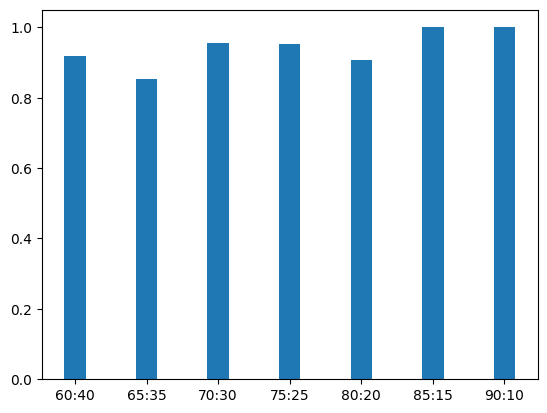

In [ ]:
plt.bar(f1_b.keys(), f1_b.values(), 0.3)

## Деревья решений

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
accuracy_t = dict()
precision_t = dict()
recall_t = dict()
f1_t = dict()
for tr_size in np.arange(0.6, 0.9, 0.05):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  clf = clf.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_t[key] = accuracy_score(y_val, clf.predict(X_val))
  precision_t[key] = precision_score(y_val, clf.predict(X_val), average='macro')
  recall_t[key] = recall_score(y_val, clf.predict(X_val), average='macro')
  f1_t[key] = f1_score(y_val, clf.predict(X_val), average='macro')

<BarContainer object of 7 artists>

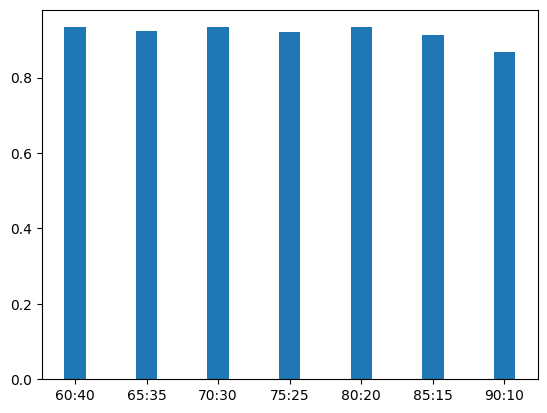

In [ ]:
plt.bar(accuracy_t.keys(), accuracy_t.values(), 0.3)

<BarContainer object of 7 artists>

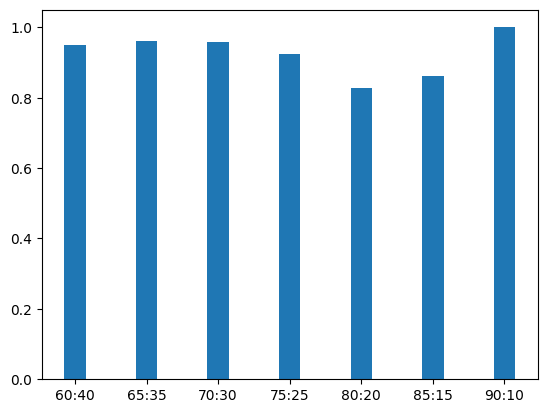

In [ ]:
plt.bar(precision_t.keys(), precision_t.values(), 0.3)

<BarContainer object of 7 artists>

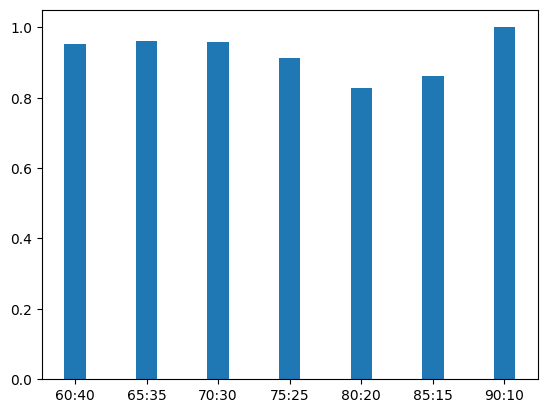

In [ ]:
plt.bar(recall_t.keys(), recall_t.values(), 0.3)

<BarContainer object of 7 artists>

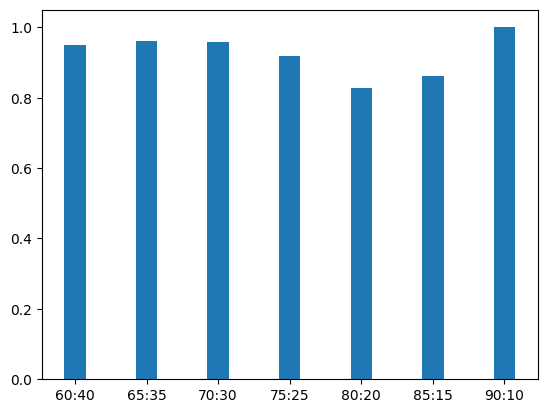

In [ ]:
plt.bar(f1_t.keys(), f1_t.values(), 0.3)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'log_loss')
for tr_size in np.arange(0.6, 0.9, 0.05):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  clf = clf.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_t[key] = accuracy_score(y_val, clf.predict(X_val))
  precision_t[key] = precision_score(y_val, clf.predict(X_val), average='macro')
  recall_t[key] = recall_score(y_val, clf.predict(X_val), average='macro')
  f1_t[key] = f1_score(y_val, clf.predict(X_val), average='macro')

<BarContainer object of 7 artists>

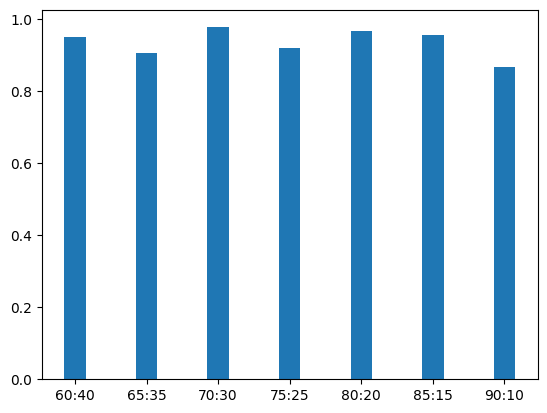

In [ ]:
plt.bar(accuracy_t.keys(), accuracy_t.values(), 0.3)

<BarContainer object of 7 artists>

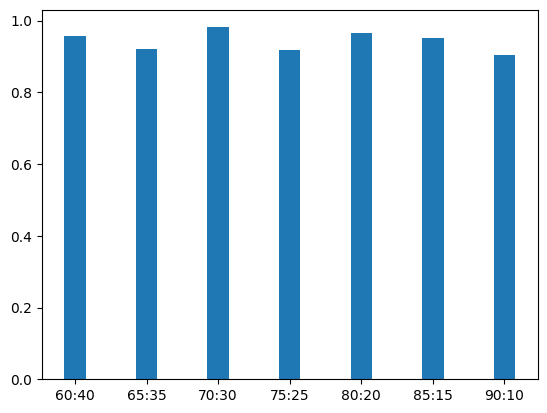

In [ ]:
plt.bar(precision_t.keys(), precision_t.values(), 0.3)

<BarContainer object of 7 artists>

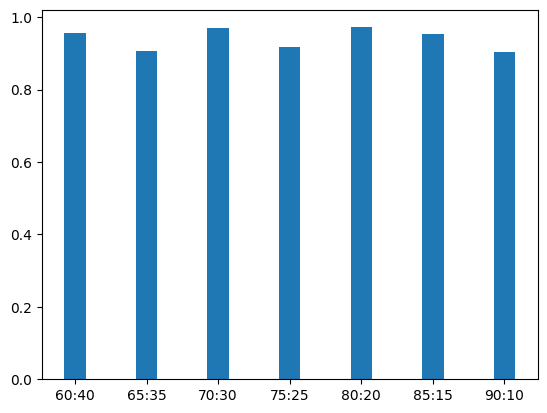

In [ ]:
plt.bar(recall_t.keys(), recall_t.values(), 0.3)

<BarContainer object of 7 artists>

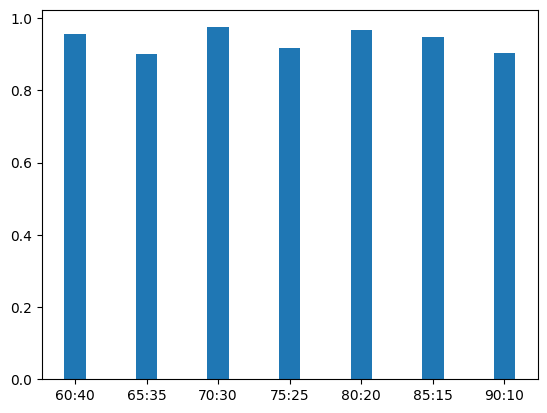

In [ ]:
plt.bar(f1_t.keys(), f1_t.values(), 0.3)

## Бэггинг

In [ ]:
from sklearn import ensemble
bclf = ensemble.BaggingClassifier()
accuracy_beg = dict()
precision_beg = dict()
recall_beg = dict()
f1_beg = dict()
for tr_size in np.arange(0.5, 1, 0.1):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  bclf = bclf.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_beg[key] = accuracy_score(y_val, bclf.predict(X_val))
  precision_beg[key] = precision_score(y_val, bclf.predict(X_val), average='macro')
  recall_beg[key] = recall_score(y_val, bclf.predict(X_val), average='macro')
  f1_beg[key] = f1_score(y_val, bclf.predict(X_val), average='macro')

<BarContainer object of 5 artists>

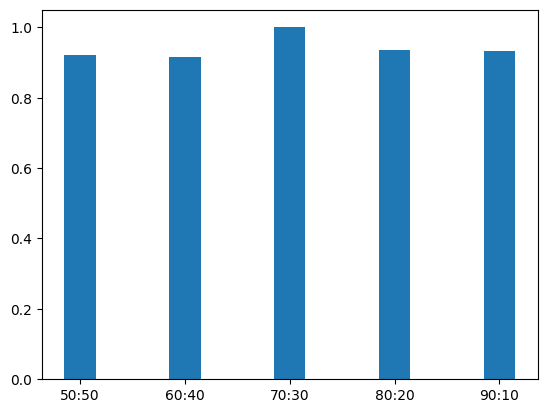

In [ ]:
plt.bar(accuracy_beg.keys(), accuracy_beg.values(), 0.3)

<BarContainer object of 5 artists>

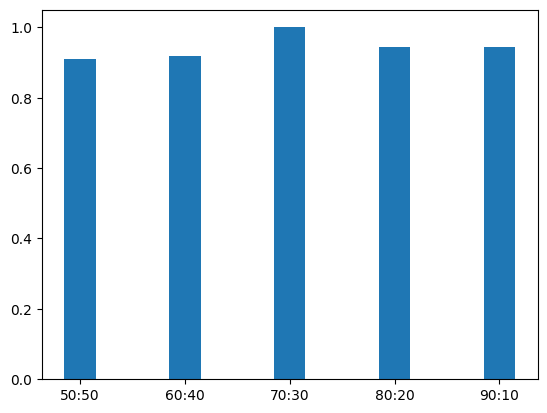

In [ ]:
plt.bar(precision_beg.keys(), precision_beg.values(), 0.3)

<BarContainer object of 5 artists>

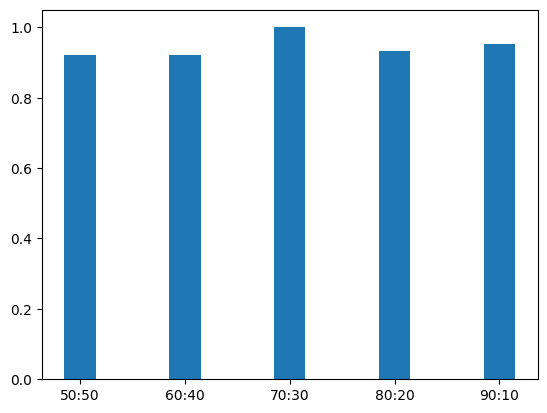

In [ ]:
plt.bar(recall_beg.keys(), recall_beg.values(), 0.3)

<BarContainer object of 5 artists>

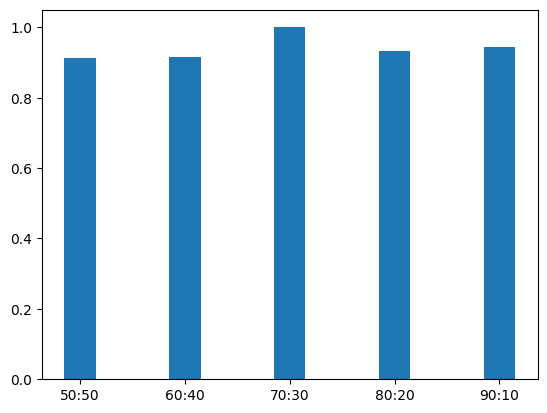

In [ ]:
plt.bar(f1_beg.keys(), f1_beg.values(), 0.3)

In [ ]:
key_beg = set(accuracy_beg.keys())
key_beg = key_beg.union(accuracy_b.keys())
key_beg = list(key_beg)
key_beg.sort()

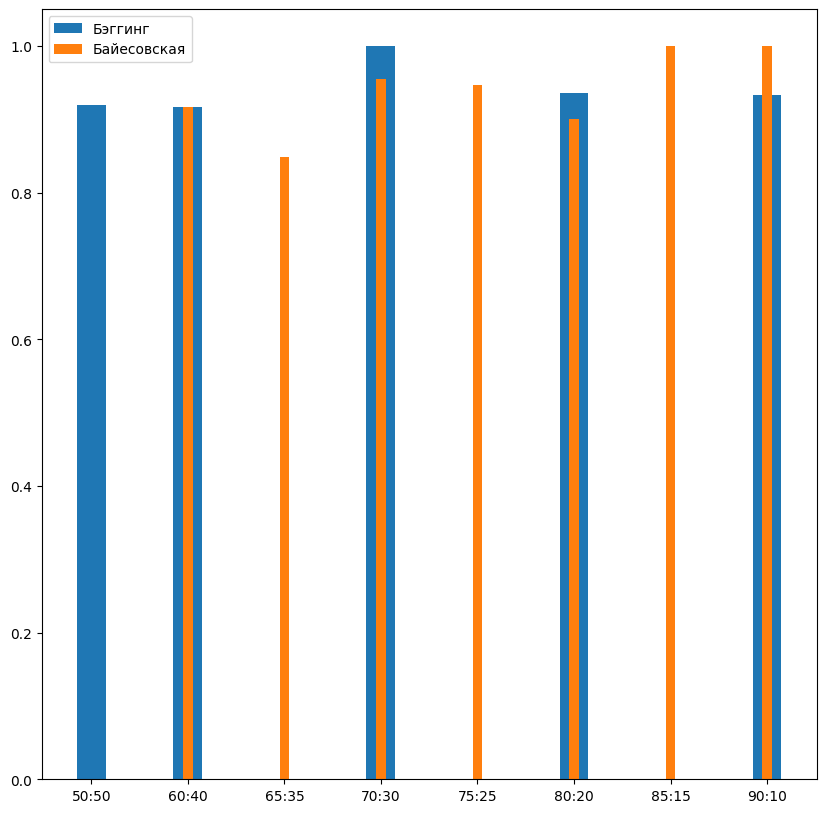

In [ ]:
val_beg = list()
val_b = list()
for key in key_beg:
  if key in accuracy_beg.keys():
    val_beg.append(accuracy_beg[key])
  else:
    val_beg.append(0)

  if key in accuracy_b.keys():
    val_b.append(accuracy_b[key])
  else:
    val_b.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_b, 0.1, label = 'Байесовская')
plt.legend()

<BarContainer object of 8 artists>

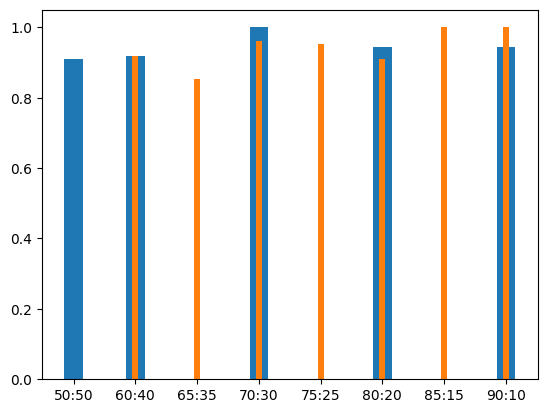

In [ ]:
val_beg = list()
val_b = list()
for key in key_beg:
  if key in precision_beg.keys():
    val_beg.append(precision_beg[key])
  else:
    val_beg.append(0)

  if key in precision_b.keys():
    val_b.append(precision_b[key])
  else:
    val_b.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

<BarContainer object of 8 artists>

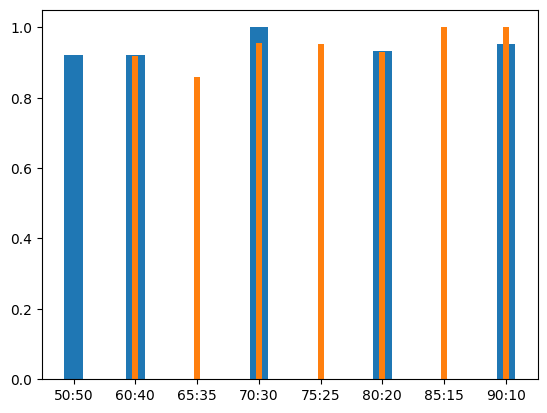

In [ ]:
val_beg = list()
val_b = list()
for key in key_beg:
  if key in recall_beg.keys():
    val_beg.append(recall_beg[key])
  else:
    val_beg.append(0)

  if key in recall_b.keys():
    val_b.append(recall_b[key])
  else:
    val_b.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

<BarContainer object of 8 artists>

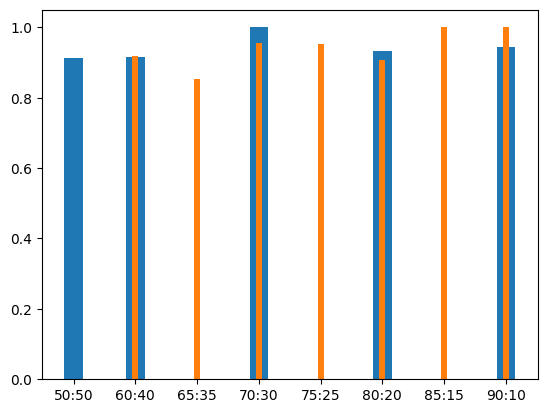

In [ ]:
val_beg = list()
val_b = list()
for key in key_beg:
  if key in f1_beg.keys():
    val_beg.append(f1_beg[key])
  else:
    val_beg.append(0)

  if key in f1_b.keys():
    val_b.append(f1_b[key])
  else:
    val_b.append(0)
plt.figure(figsize=(10,10))
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

## Случайный лес

In [ ]:
from sklearn import ensemble
rclf = ensemble.RandomForestClassifier()
accuracy_r = dict()
precision_r = dict()
recall_r = dict()
f1_r = dict()
for tr_size in np.arange(0.5, 1, 0.1):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  rclf = rclf.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_r[key] = accuracy_score(y_val, rclf.predict(X_val))
  precision_r[key] = precision_score(y_val, rclf.predict(X_val), average='macro')
  recall_r[key] = recall_score(y_val, rclf.predict(X_val), average='macro')
  f1_r[key] = f1_score(y_val, rclf.predict(X_val), average='macro')

<BarContainer object of 5 artists>

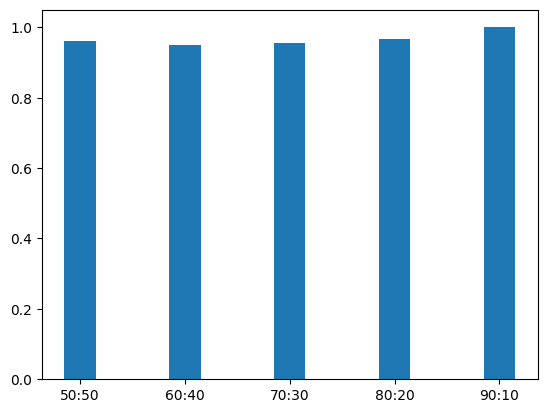

In [ ]:
plt.bar(accuracy_r.keys(), accuracy_r.values(), 0.3)

<BarContainer object of 5 artists>

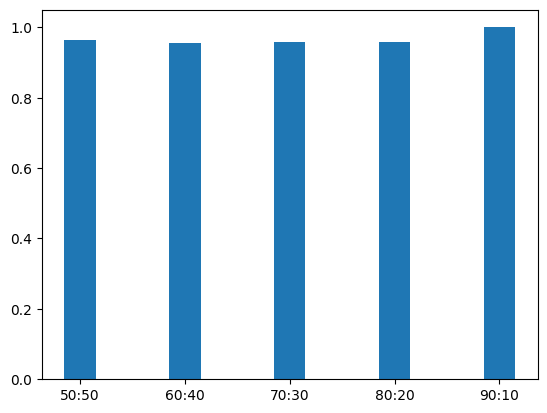

In [ ]:
plt.bar(precision_r.keys(), precision_r.values(), 0.3)

<BarContainer object of 5 artists>

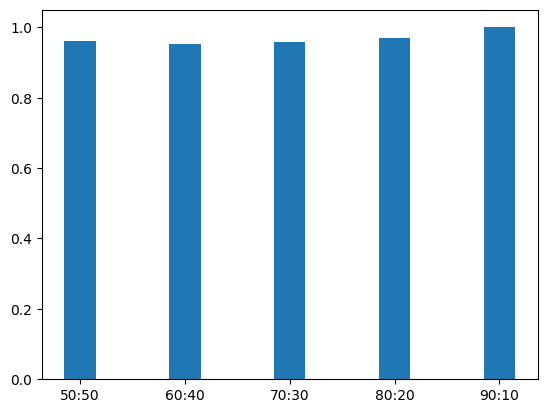

In [ ]:
plt.bar(recall_r.keys(), recall_r.values(), 0.3)

<BarContainer object of 5 artists>

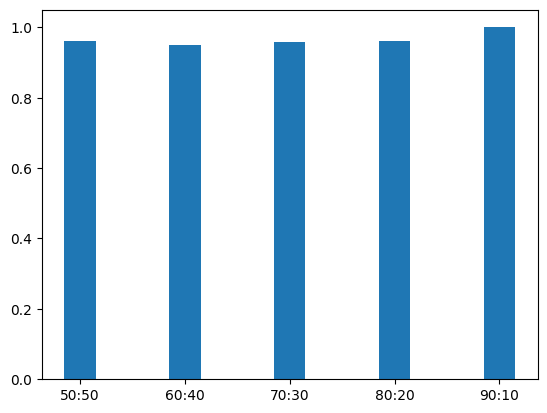

In [ ]:
plt.bar(f1_r.keys(), f1_r.values(), 0.3)

<BarContainer object of 8 artists>

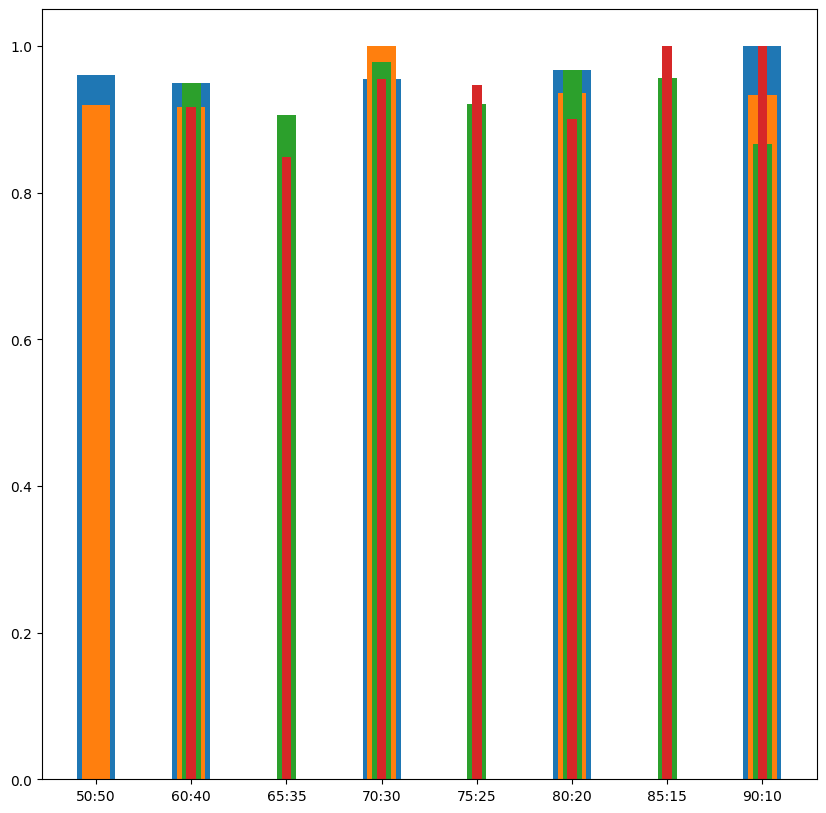

In [ ]:
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in accuracy_b.keys():
    val_b.append(accuracy_b[key])
  else:
    val_b.append(0)

  if key in accuracy_t.keys():
    val_t.append(accuracy_t[key])
  else:
    val_t.append(0)

  if key in accuracy_beg.keys():
    val_beg.append(accuracy_beg[key])
  else:
    val_beg.append(0)

  if key in accuracy_r.keys():
    val_r.append(accuracy_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

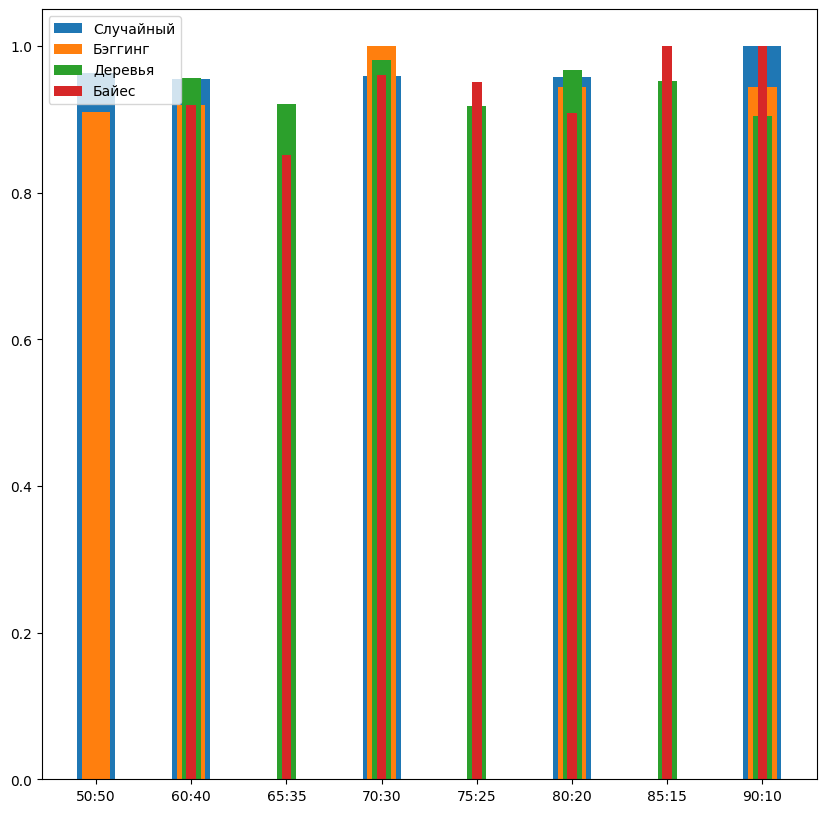

In [ ]:
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in precision_b.keys():
    val_b.append(precision_b[key])
  else:
    val_b.append(0)

  if key in precision_t.keys():
    val_t.append(precision_t[key])
  else:
    val_t.append(0)

  if key in precision_beg.keys():
    val_beg.append(precision_beg[key])
  else:
    val_beg.append(0)

  if key in precision_r.keys():
    val_r.append(precision_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

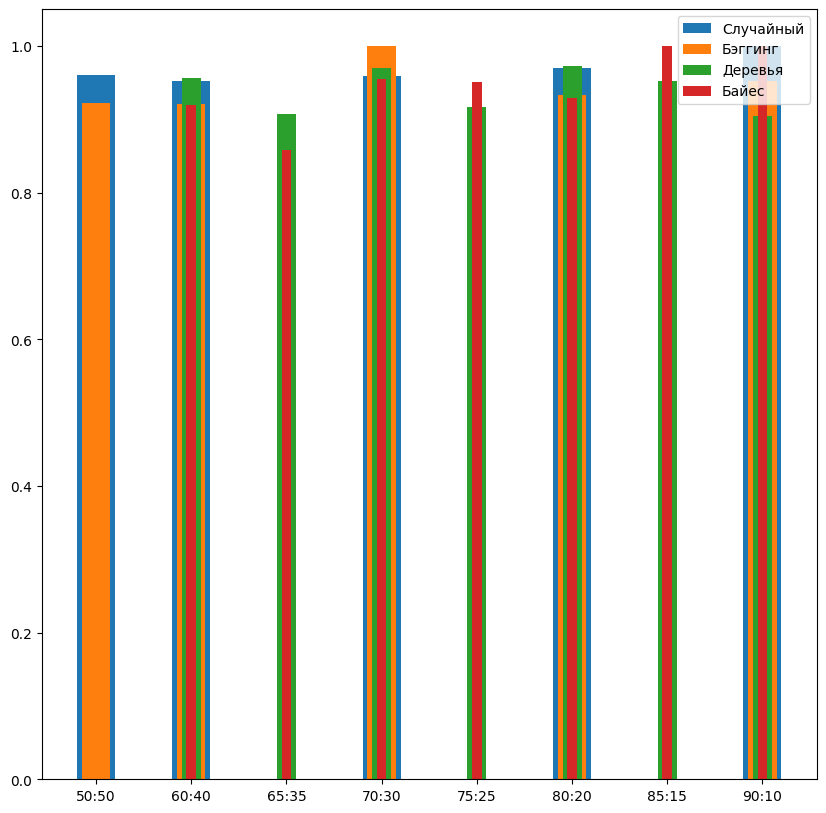

In [ ]:
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in recall_b.keys():
    val_b.append(recall_b[key])
  else:
    val_b.append(0)

  if key in recall_t.keys():
    val_t.append(recall_t[key])
  else:
    val_t.append(0)

  if key in recall_beg.keys():
    val_beg.append(recall_beg[key])
  else:
    val_beg.append(0)

  if key in recall_r.keys():
    val_r.append(recall_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

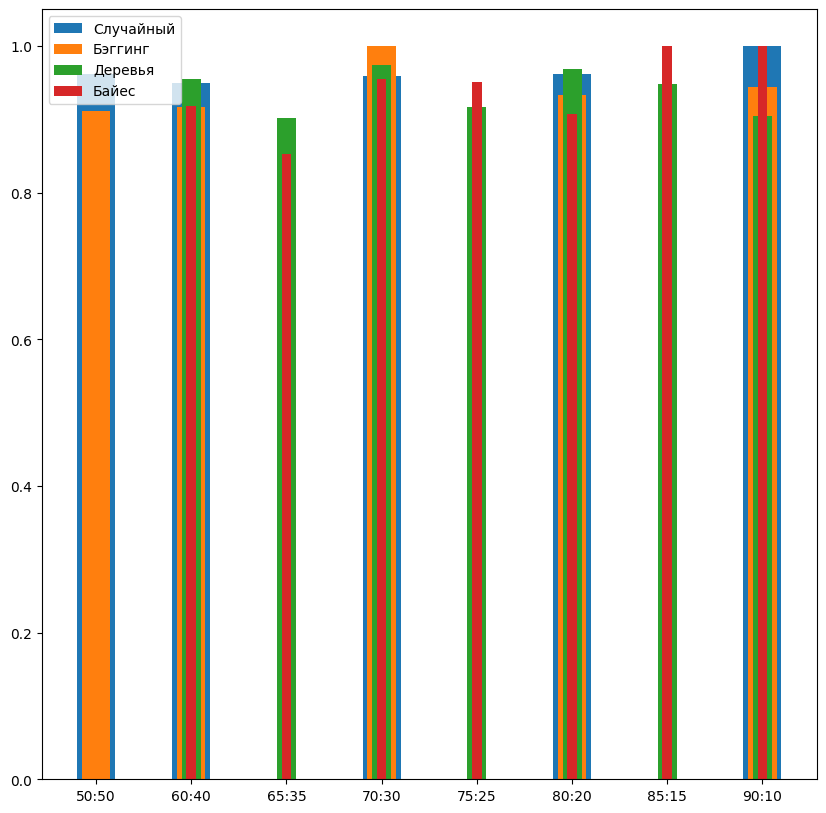

In [ ]:
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in f1_b.keys():
    val_b.append(f1_b[key])
  else:
    val_b.append(0)

  if key in f1_t.keys():
    val_t.append(f1_t[key])
  else:
    val_t.append(0)

  if key in f1_beg.keys():
    val_beg.append(f1_beg[key])
  else:
    val_beg.append(0)

  if key in f1_r.keys():
    val_r.append(f1_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

## Бустинг

In [ ]:
from sklearn import ensemble
bclf = ensemble.GradientBoostingClassifier()
accuracy_bu = dict()
precision_bu = dict()
recall_bu = dict()
f1_bu = dict()
for tr_size in np.arange(0.5, 1, 0.1):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  bclf = bclf.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_bu[key] = accuracy_score(y_val, bclf.predict(X_val))
  precision_bu[key] = precision_score(y_val, bclf.predict(X_val), average='macro')
  recall_bu[key] = recall_score(y_val, bclf.predict(X_val), average='macro')
  f1_bu[key] = f1_score(y_val, bclf.predict(X_val), average='macro')

<BarContainer object of 5 artists>

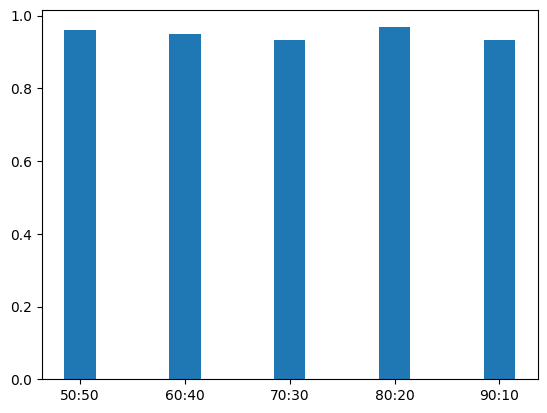

In [ ]:
plt.bar(accuracy_bu.keys(), accuracy_bu.values(), 0.3)

<BarContainer object of 5 artists>

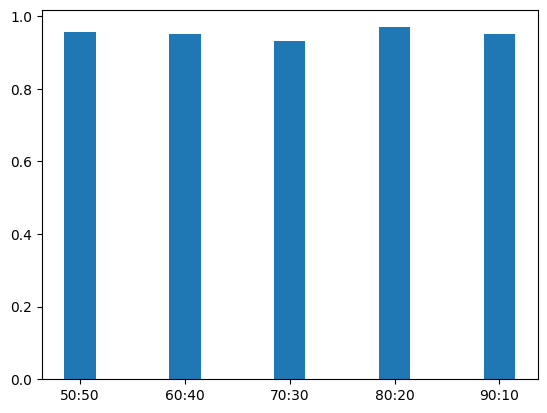

In [ ]:
plt.bar(precision_bu.keys(), precision_bu.values(), 0.3)

<BarContainer object of 5 artists>

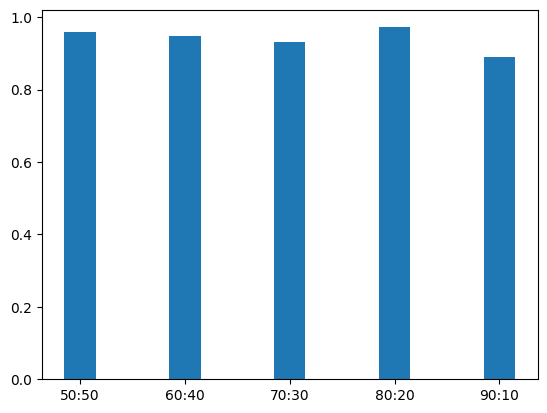

In [ ]:
plt.bar(recall_bu.keys(), recall_bu.values(), 0.3)

<BarContainer object of 5 artists>

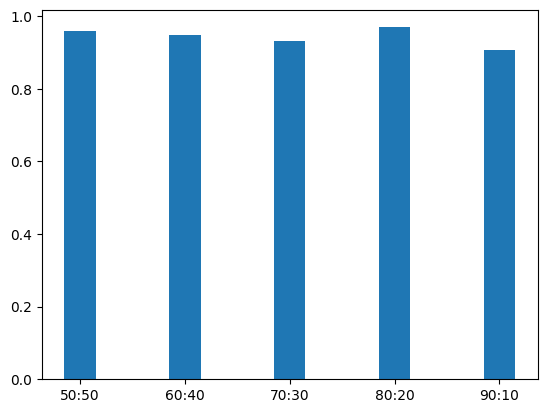

In [ ]:
plt.bar(f1_bu.keys(), f1_bu.values(), 0.3)

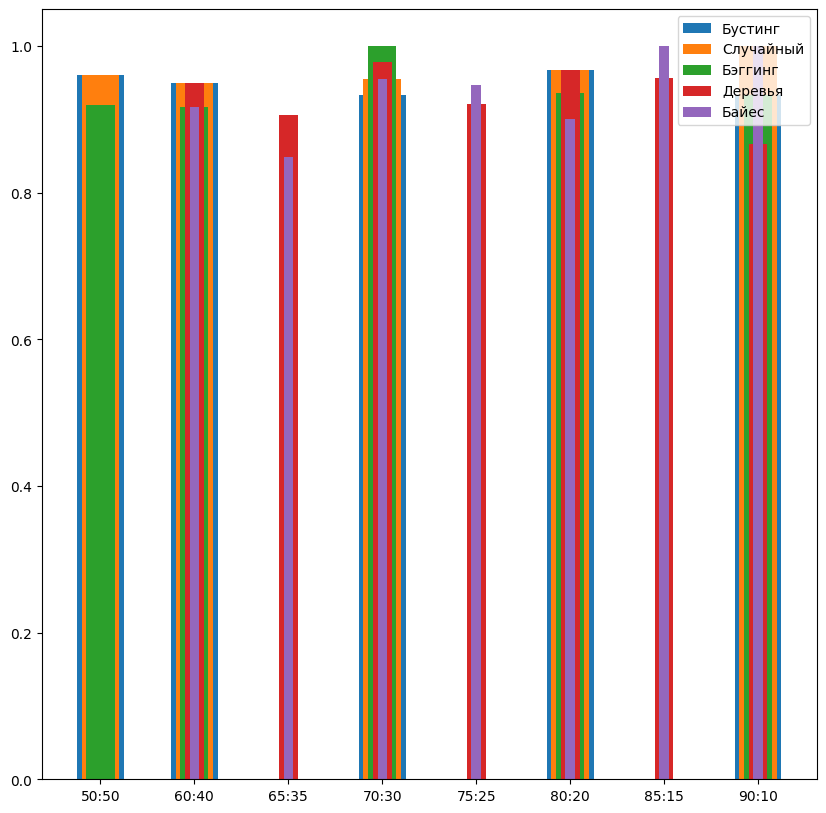

In [ ]:
val_bu = list()
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in accuracy_bu.keys():
    val_bu.append(accuracy_bu[key])
  else:
    val_bu.append(0)

  if key in accuracy_b.keys():
    val_b.append(accuracy_b[key])
  else:
    val_b.append(0)

  if key in accuracy_t.keys():
    val_t.append(accuracy_t[key])
  else:
    val_t.append(0)

  if key in accuracy_beg.keys():
    val_beg.append(accuracy_beg[key])
  else:
    val_beg.append(0)

  if key in accuracy_r.keys():
    val_r.append(accuracy_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_bu, 0.5, label = 'Бустинг')
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

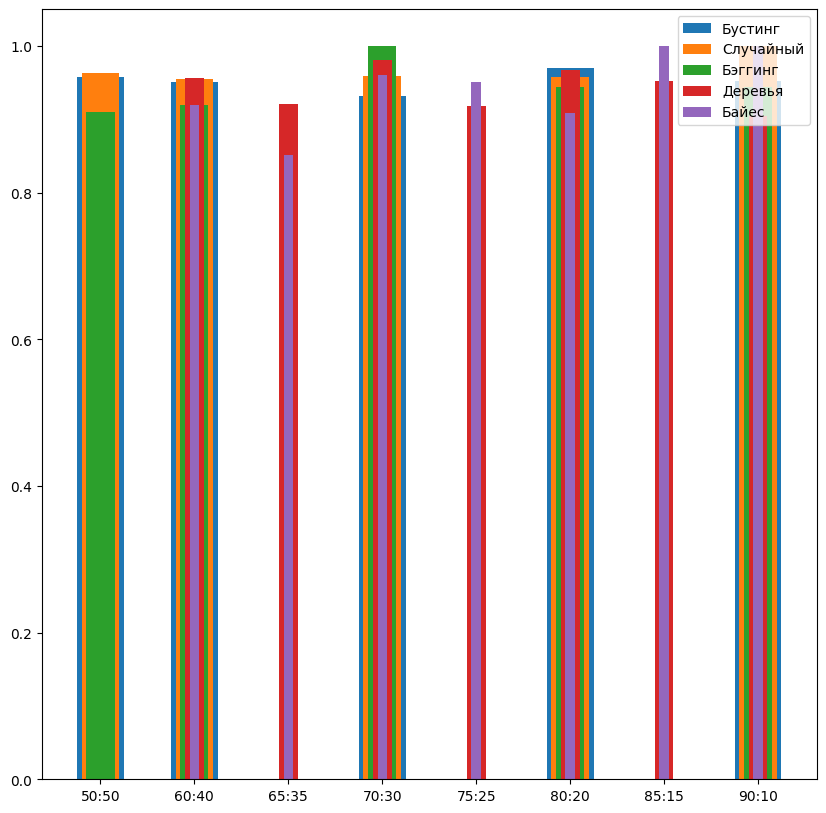

In [ ]:
val_bu = list()
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in precision_bu.keys():
    val_bu.append(precision_bu[key])
  else:
    val_bu.append(0)

  if key in precision_b.keys():
    val_b.append(precision_b[key])
  else:
    val_b.append(0)

  if key in precision_t.keys():
    val_t.append(precision_t[key])
  else:
    val_t.append(0)

  if key in precision_beg.keys():
    val_beg.append(precision_beg[key])
  else:
    val_beg.append(0)

  if key in precision_r.keys():
    val_r.append(precision_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_bu, 0.5, label = 'Бустинг')
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

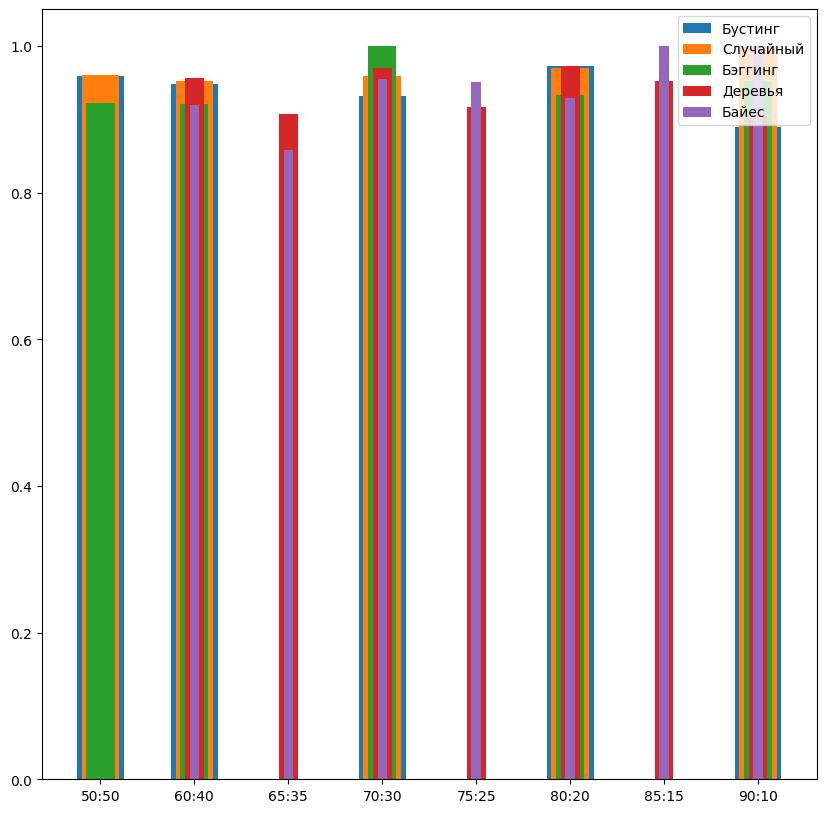

In [ ]:
val_bu = list()
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in recall_bu.keys():
    val_bu.append(recall_bu[key])
  else:
    val_bu.append(0)

  if key in recall_b.keys():
    val_b.append(recall_b[key])
  else:
    val_b.append(0)

  if key in recall_t.keys():
    val_t.append(recall_t[key])
  else:
    val_t.append(0)

  if key in recall_beg.keys():
    val_beg.append(recall_beg[key])
  else:
    val_beg.append(0)

  if key in recall_r.keys():
    val_r.append(recall_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_bu, 0.5, label = 'Бустинг')
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()

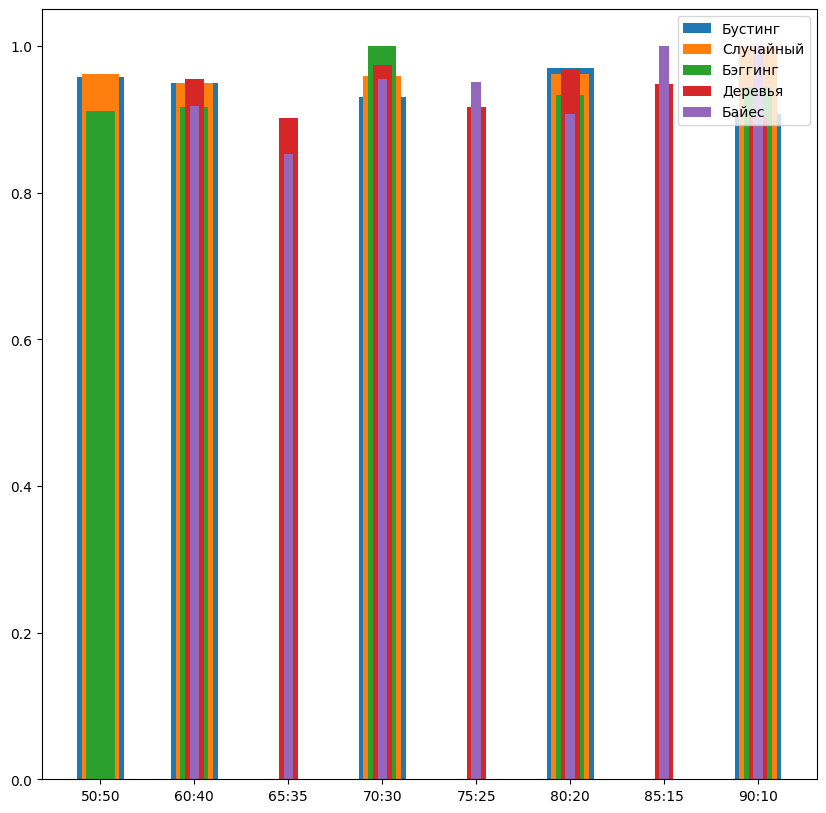

In [ ]:
val_bu = list()
val_beg = list()
val_b = list()
val_t = list()
val_r = list()
for key in key_beg:

  if key in f1_bu.keys():
    val_bu.append(f1_bu[key])
  else:
    val_bu.append(0)

  if key in f1_b.keys():
    val_b.append(f1_b[key])
  else:
    val_b.append(0)

  if key in f1_t.keys():
    val_t.append(f1_t[key])
  else:
    val_t.append(0)

  if key in f1_beg.keys():
    val_beg.append(f1_beg[key])
  else:
    val_beg.append(0)

  if key in f1_r.keys():
    val_r.append(f1_r[key])
  else:
    val_r.append(0)

plt.figure(figsize=(10,10))
plt.bar(key_beg, val_bu, 0.5, label = 'Бустинг')
plt.bar(key_beg, val_r, 0.4, label = 'Случайный')
plt.bar(key_beg, val_beg, 0.3, label = 'Бэггинг')
plt.bar(key_beg, val_t, 0.2, label = 'Деревья')
plt.bar(key_beg, val_b, 0.1, label = 'Байес')
plt.legend()